<h1>Лаба №5</h1>
<h2>Студента БС-83</h2>
<h2>Кльоміна Павла</h2>

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [7]:
database = sns.load_dataset('titanic')
database


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
data = pd.DataFrame({
    'who':database['who'],      
    'alive':database['alive']
})

data

,who,alive
0,man,no
1,woman,yes
2,woman,yes
3,woman,yes
4,man,no
...,...,...
886,man,no
887,woman,yes
888,woman,no
889,man,yes


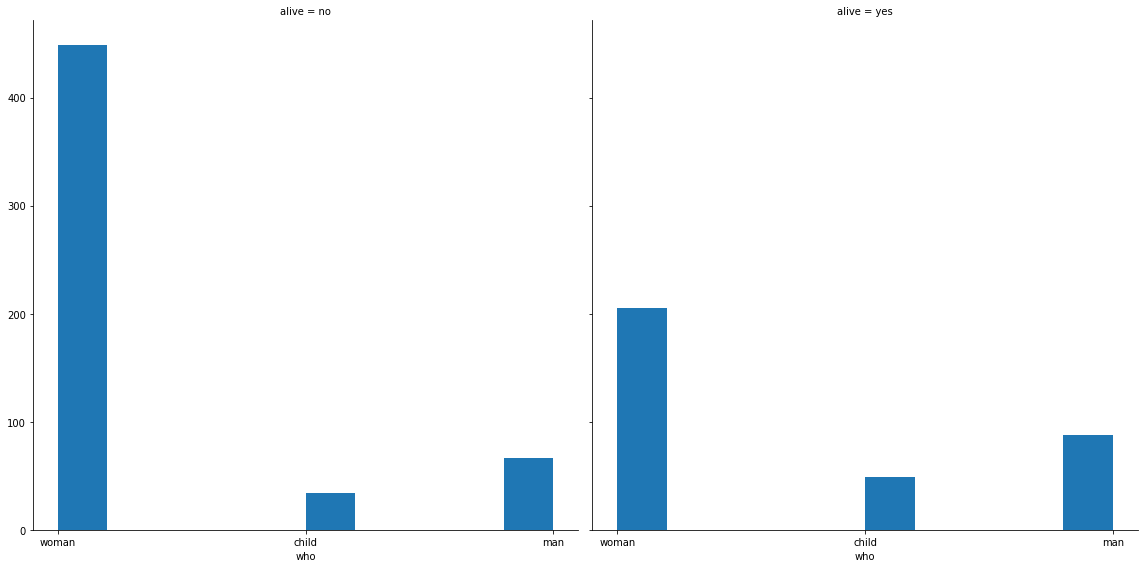

In [9]:
g = sns.FacetGrid(database, col="alive", height= 8)
g = g.map(plt.hist, "who");

In [137]:
def pirson(data,significant_level):
    array_priznak = []          
    for i in data.iloc[:,0]:
        bl = True
        for j in array_priznak:
            if(i == j):
                bl = False
        if(bl):
            array_priznak.append(i)
            
    array_group = []           
    for i in data.iloc[:,1]:
        bl = True
        for j in array_group:
            if(i == j):
                bl = False
        if(bl):
            array_group.append(i)
            
    array_priznak = np.sort(array_priznak)
    array_group = np.sort(array_group)
    
    table_pirs = pd.DataFrame({               
        (array_group[0]):[0 for i in range(len(array_priznak))],
        (array_group[1]):[0 for i in range(len(array_priznak))]
    }, index = array_priznak);
    
    table_pirs.index.name = data.columns[0]
    

    for i in range(len(data)):                
        table_pirs[data.iloc[i,1]][data.iloc[i,0]] += 1
        
    print("Початкова таблиця:")
    print(table_pirs)
    print("\nСума двох колонок до їх зміни:\nПершої %f"%sum(table_pirs.iloc[:,0])+"\nДругої %f"%sum(table_pirs.iloc[:,1]))
    
    if (sum(table_pirs.iloc[:,0]) != sum(table_pirs.iloc[:,1])):
        table_pirs[table_pirs.columns[1]] = [
            x/sum(table_pirs.iloc[:,1])*sum(table_pirs.iloc[:,0]) 
            for x in table_pirs.iloc[:,1] 
        ]
    print("\nСума двох колонок після їх зміни:\nПершої %f"%sum(table_pirs.iloc[:,0])+"\nДругої %f"%sum(table_pirs.iloc[:,1]))
    table_pirs['(ni-ni`)'] = [(table_pirs.iloc[i,0] - table_pirs.iloc[i,1]) for i in range(len(table_pirs))]
    table_pirs['(ni-ni`)^2/ni`'] = [(table_pirs.iloc[i,2]**2/table_pirs.iloc[i,1]) for i in range(len(table_pirs))]
    print("\nКінцева таблиця з параметрами КРИТЕРІЯ ПІРСОНА:")
    print(table_pirs)
    
    chi2 =  sum(table_pirs.iloc[:,3])
    print("\nX^2(емпіричне) - " + str(chi2))
    
    r = len(table_pirs)-1
    print("ступінь свободи - " + str(r))
    
    crit_pirson = pd.read_excel("Таблиця критичних значень для критерію Пірсона.xlsx").iloc[r, 1 if(significant_level == 0.01) else 2]
    print("X^2(табличне) - " + str(crit_pirson))
    print("Відповідь:")
    
    if (chi2 < crit_pirson):
        print("Статистична розбіжність відсутня або не суттєва %f"%chi2 +"(эмп) %f"%crit_pirson+"(табл)") 
    else:
        print("Статистичная розбіжність присутня %f"%chi2 +"(емп) %f"%crit_pirson+"(табл)") 
           
            
        
    
   

In [138]:
significant_level=0.05
pirson(data,significant_level)

Початкова таблиця:
        no  yes
who            
child   34   49
man    449   88
woman   66  205

Сума двох колонок до їх зміни:
Першої 549.000000
Другої 342.000000

Сума двох колонок після їх зміни:
Першої 549.000000
Другої 549.000000

Кінцева таблиця з параметрами КРИТЕРІЯ ПІРСОНА:
        no         yes    (ni-ni`)  (ni-ni`)^2/ni`
who                                               
child   34   78.657895  -44.657895       25.354449
man    449  141.263158  307.736842      670.393933
woman   66  329.078947 -263.078947      210.315893

X^2(емпіричне) - 906.0642742161024
ступінь свободи - 2
X^2(табличне) - 6
Відповідь:
Статистичная розбіжність присутня 906.064274(емп) 6.000000(табл)


In [169]:
data_table = pd.DataFrame({
    "Alive": [0 for i in range(3)],
    "Not Alive": [0 for i in range(3)],
    "%Alive": [0 for i in range(3)],
    "%Not Alive": [0 for i in range(3)],
}, index = ["man", "woman", "child"])
for i in range (len(data)):
    data_table["Alive" if (data["alive"][i] == 'yes') else "Not Alive"][data["who"][i]] += 1
for i in range(0,len(data_table)):
    data_table.iloc[i,2] = str(round(data_table["Alive"][i]/sum(data_table["Alive"])*100,1)) + "%"
    data_table.iloc[i,3] = str(round(data_table["Not Alive"][i]/sum(data_table["Not Alive"])*100,1)) + "%"
data_table

,Alive,Not Alive,%Alive,%Not Alive
man,88,449,25.7%,81.8%
woman,205,66,59.9%,12.0%
child,49,34,14.3%,6.2%


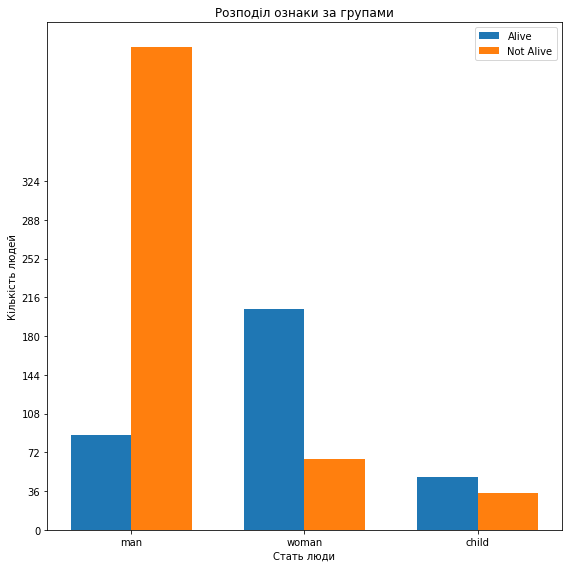

In [171]:
x = np.arange(len(data_table))
width = 0.35
y = [i for i in np.linspace(0,324,10)]
labels = ["man", "woman", "child"]

fig, ax = plt.subplots(figsize=(8,8))
fig.height = 10
rects1 = ax.bar(x - width/2, data_table["Alive"], width, label='Alive')
rects2 = ax.bar(x + width/2, data_table["Not Alive"], width, label='Not Alive')

ax.set_ylabel('Кількість людей')
ax.set_xlabel('Стать люди')
ax.set_title('Розподіл ознаки за групами')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)

ax.legend()

fig.tight_layout()